In [1]:
import os
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_corr_matrix(corr_df):
    # Upper triangle
    mask = np.triu(np.ones_like(corr_df, dtype=bool))

    # Thhe heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        corr_df,
        mask=mask,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True, 
        annot_kws={"size": 5.5}  
    )

    # Customize 
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Optional: set y-tick labels rotation
    ax = plt.gca()  
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)
    # ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

    plt.show()

# Import data

In [5]:
df_features = pd.read_excel('ReductionKetone_withFeatures.xlsx')
unnecessary_columns = ['Reaction', 'Reactant', 'Product', 'Reagent', 'Catalyst',
       'Solvent (Reaction Details)', 'Time (Reaction Details) [h]',
       'Temperature (Reaction Details) [C]', 'Yield', 'Reaction ID',
       'Links to Reaxys', 'Reaction: Links to Reaxys', 'References',
        'Reactant SMILES', 'Product SMILES', 'Change_MW', 'change in C-O single bond',
       'change in C=O double bond', 'Procedure', 'Reaction Map',
       'Reactant smiles map', 'Product smiles map', 'C_idx', 'O_idx', 
       'C_alpha_indexes','C_alpha_index 1', 'C_alpha_index 2',
       'Number sub group at index 1', 'Number sub group at index 2',
       'L_alpha1', 'Bmin_alpha1', 'Bmax_alpha1', 'L_alpha2', 'Bmin_alpha2',
       'Bmax_alpha2', 'PBV_alpha1', 'PBV_alpha2'
       ]
features_col_yield = df_features.drop(columns=unnecessary_columns)

# Remove high correlated features

In [6]:
corr = features_col_yield.corr()
# Extract correlations with 'Yield (number)'
yield_corr = corr['Yield (number)'].drop('Yield (number)')  # Drop 'Yield (number)' to exclude self-correlation
yield_corr_df = pd.DataFrame({
    'Feature': yield_corr.index,
    'Correlation': yield_corr.values
})

# Sort by absolute value of correlation
yield_corr_df['Abs_Correlation'] = yield_corr_df['Correlation'].abs()
yield_corr_df = yield_corr_df.sort_values(by='Abs_Correlation', ascending=False)
yield_corr_df = yield_corr_df.drop('Abs_Correlation', axis=1)

yield_corr_df
# # Create a bar plot
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=yield_corr_df, y='Feature', x='Correlation', color='cornflowerblue')
# ax.set_xlim(-0.4, 0.4)
# # Customize plot
# plt.xticks(rotation=45, horizontalalignment='right')
# plt.ylabel('Feature')
# plt.xlabel('Correlation with Yield (number)')
# plt.show()

,Feature,Correlation
1,Ring,-0.262696
32,Bmax_alpha Sum,-0.241981
21,GeometricTopo,-0.234816
18,Diameter,-0.206422
2,aroma_Ring,-0.196534
22,ArithmeticTopo,-0.196014
7,Number of ketone,0.192964
28,Bmax,-0.189856
20,SimpleTopo,-0.161501
15,C_T,-0.150620


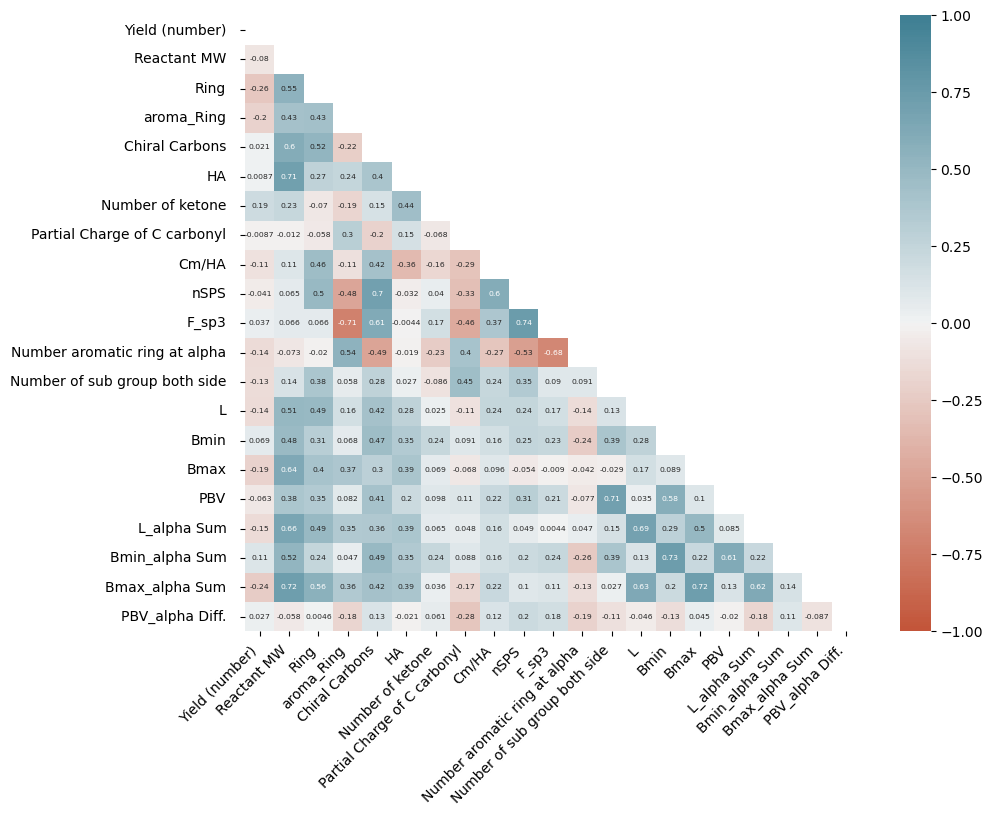

In [7]:
# Find features with correlation greater than 0.8
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# drop high correlated features + keep the Yield(number)
features_col_new_08 = features_col_yield.copy()
features_col_new_08.drop(to_drop, axis=1, inplace=True)
features_col_new_08.columns

corr_new08 = features_col_new_08.corr()
plot_corr_matrix(corr_new08)

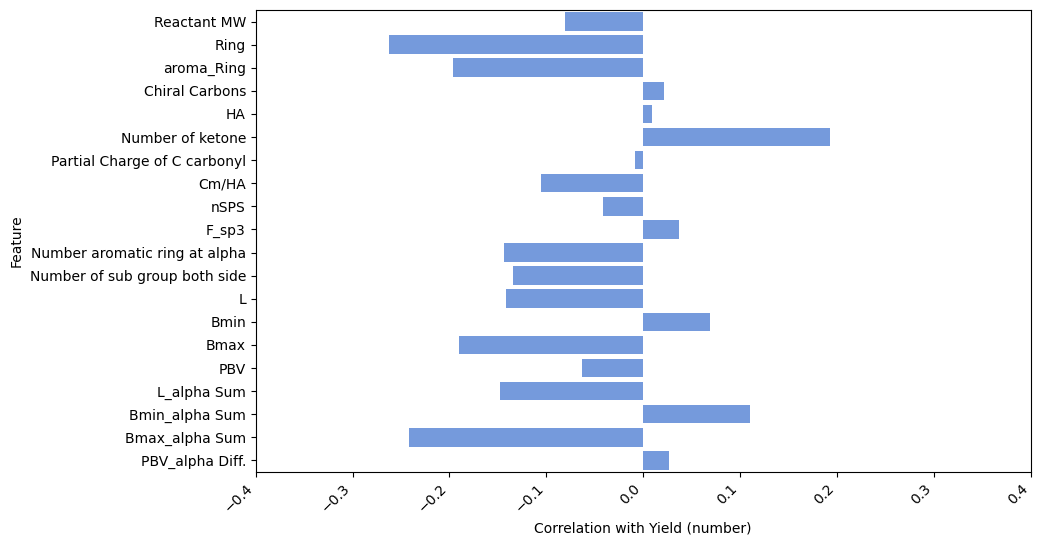

In [8]:
# Extract correlations with 'Yield (number)'
yield_corr = corr_new08['Yield (number)'].drop('Yield (number)')  # Drop 'Yield (number)' to exclude self-correlation
yield_corr_df = pd.DataFrame({
    'Feature': yield_corr.index,
    'Correlation': yield_corr.values
})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=yield_corr_df, y='Feature', x='Correlation', color = 'cornflowerblue')
ax.set_xlim(-0.4, 0.4)
# Customize plot
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Feature')
plt.xlabel('Correlation with Yield (number)')
# plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

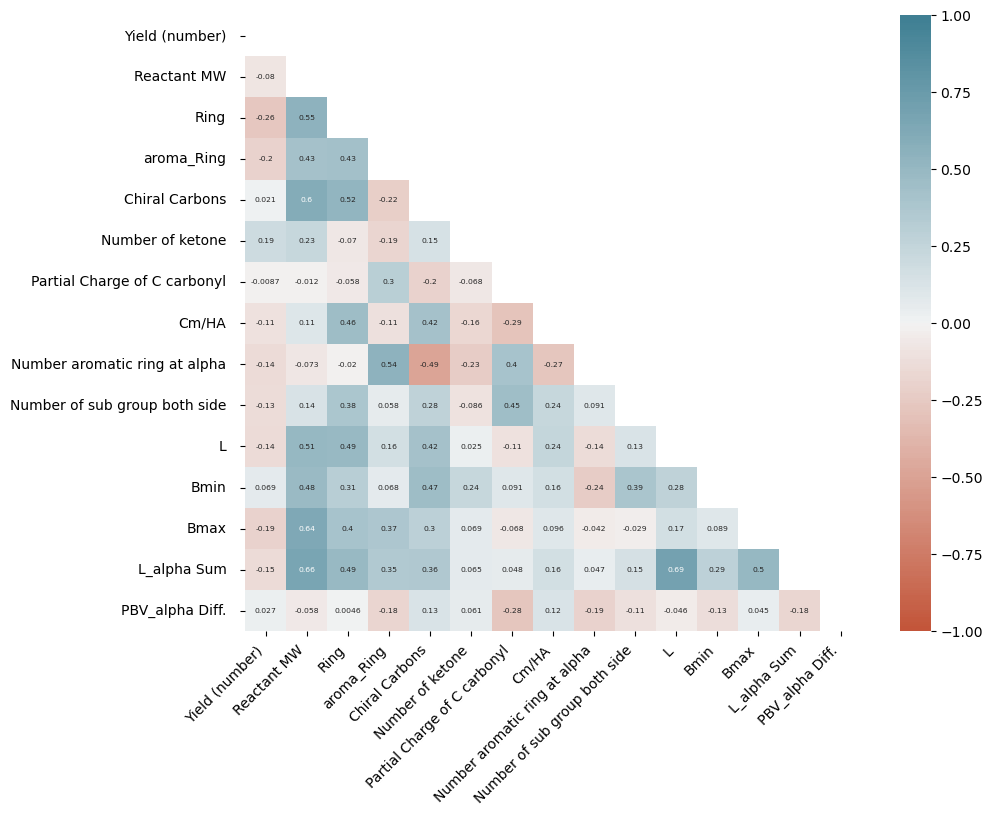

In [9]:
# Find features with correlation greater than 0.7
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
# drop high correlated features + keep the Yield(number)
features_col_new_07 = features_col_yield.copy()
features_col_new_07.drop(to_drop, axis=1, inplace=True)
corr_new07 = features_col_new_07.corr()
plot_corr_matrix(corr_new07)

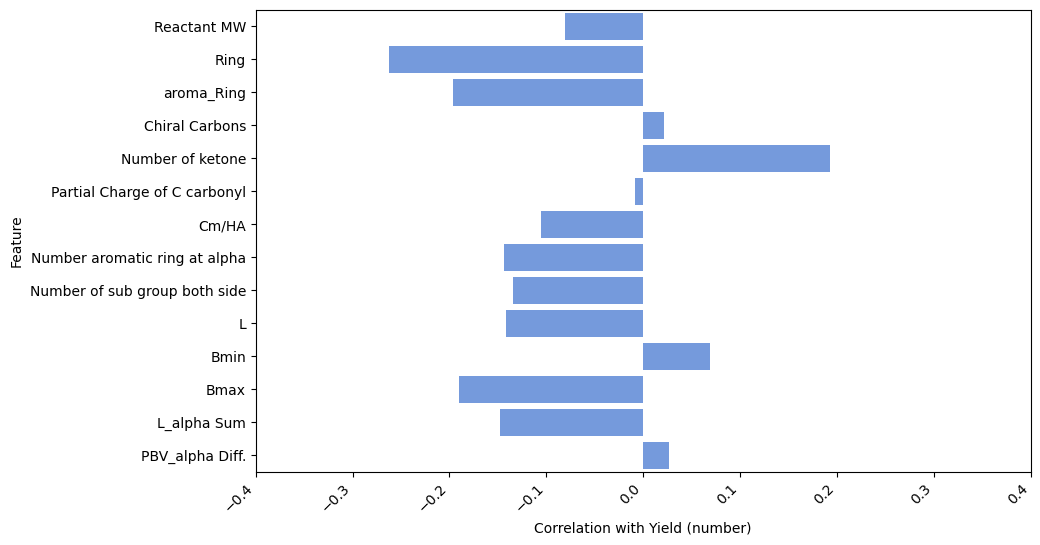

In [10]:
# Extract correlations with 'Yield (number)'
yield_corr = corr_new07['Yield (number)'].drop('Yield (number)')  # Drop 'Yield (number)' to exclude self-correlation
yield_corr_df = pd.DataFrame({
    'Feature': yield_corr.index,
    'Correlation': yield_corr.values
})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=yield_corr_df, y='Feature', x='Correlation', color = 'cornflowerblue')
ax.set_xlim(-0.4, 0.4)
# Customize plot
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Feature')
plt.xlabel('Correlation with Yield (number)')
# plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

-------
# Test 

In [11]:
# X = features_col_yield.drop(columns = 'Yield (number)')
# y = features_col_yield['Yield (number)']

X = features_col_new_07.drop(columns = 'Yield (number)')
y = features_col_new_07['Yield (number)']

column_names = X.columns

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Flatten back to 1D

# Split the data into train:val:test = 0.8:0.1:0.1
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=1/9, random_state=42
)

In [12]:
def cal_within_range_error(threshold, y_test, y_pred):
    within_range = np.abs(y_test - y_pred) <= threshold
    proportion_within_range = np.mean(within_range) * 100
    return proportion_within_range

In [13]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    within_range_0 = cal_within_range_error(0, y_test, y_pred)
    within_range_1 = cal_within_range_error(1, y_test, y_pred)
    within_range_5 = cal_within_range_error(5, y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return within_range_0,within_range_1, within_range_5, r2, mae, rmse

def run_experiments(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'Rige Regressor': Ridge(alpha=1.0),
        'Lasso Regressor': Lasso(alpha=0.1, max_iter=10000), 
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1), 
        
    }
    
    results = {name: {'within_range_0': [],'within_range_1': [], 'within_range_5': [], 'r2': [], 'mae': [], 'rmse': []} for name in models}
    
    for _ in range(3):
        for name, model in models.items():
            within_range_0, within_range_1, within_range_5, r2, mae, rmse = evaluate_model(model, X_train, X_test, y_train, y_test)
            results[name]['within_range_0'].append(within_range_0)
            results[name]['within_range_1'].append(within_range_1)
            results[name]['within_range_5'].append(within_range_5)
            results[name]['r2'].append(r2)
            results[name]['mae'].append(mae)
            results[name]['rmse'].append(rmse)
    
    average_results = {name: {
        'Accuracy within error of 0% yield': np.mean(results[name]['within_range_0']),
        'Accuracy within error of 1% yield': np.mean(results[name]['within_range_1']),
        'Accuracy within error of 5% yield': np.mean(results[name]['within_range_5']),
        'R squared': np.mean(results[name]['r2']),
        'MAE': np.mean(results[name]['mae']),
        'RMSE': np.mean(results[name]['rmse'])
    } for name in results}
    
    # Convert the results to a DataFrame
    df_results = pd.DataFrame(average_results).T
    df_results.reset_index(inplace=True)
    df_results.rename(columns={'index': 'Model'}, inplace=True)
    
    return df_results

results = run_experiments(X_train, X_test, y_train, y_test)
results

,Model,Accuracy within error of 0% yield,Accuracy within error of 1% yield,Accuracy within error of 5% yield,R squared,MAE,RMSE
0,LinearRegression,0.000000,3.296703,16.483516,0.183380,14.450336,17.939930
1,DecisionTreeRegressor,2.197802,9.890110,25.274725,0.070559,14.149451,19.136112
2,RandomForestRegressor,0.000000,5.860806,23.076923,0.437336,11.972502,14.891004
3,Rige Regressor,0.000000,3.296703,15.384615,0.182228,14.433497,17.952577
4,Lasso Regressor,0.000000,3.296703,15.384615,0.177923,14.447871,17.999766
5,SVR,0.000000,3.296703,20.879121,-0.092773,15.334498,20.752749
6,Gradient Boosting Regressor,0.000000,6.959707,29.304029,0.398814,12.112352,15.392702


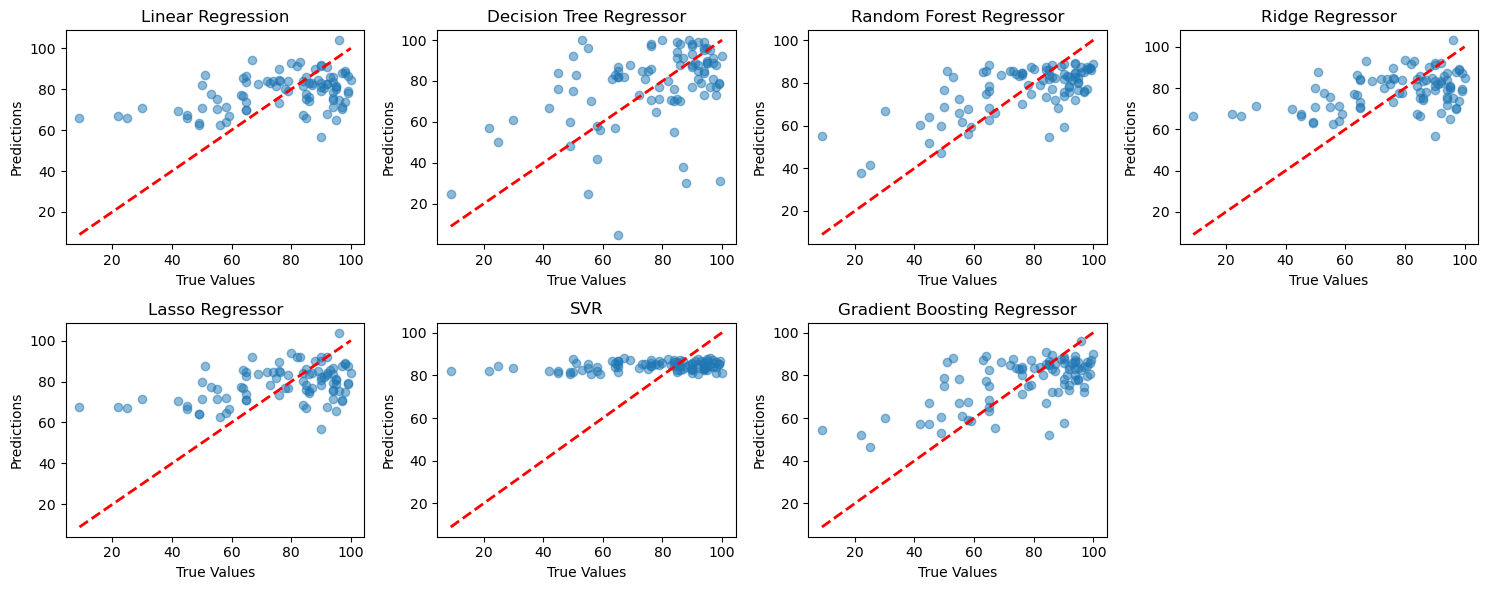

In [17]:
def plot_prediction(y_test, y_pred, ax, name):
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.set_title(name)

def evaluate_model(model, X_train, X_test, y_train, y_test, ax, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    within_range_0 = cal_within_range_error(0, y_test, y_pred)
    within_range_10 = cal_within_range_error(10, y_test, y_pred)
    within_range_20 = cal_within_range_error(20, y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    plot_prediction(y_test, y_pred, ax,name)
    
    return within_range_0, within_range_10, within_range_20, r2, mae, rmse

def plot_experiments(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'Ridge Regressor': Ridge(alpha=1.0),
        'Lasso Regressor': Lasso(alpha=0.1, max_iter=10000), 
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    }
    
    results = {name: {'within_range_0': [], 'within_range_10': [], 'within_range_20': [], 'r2': [], 'mae': [], 'rmse': []} for name in models}
    
    # Create a larger grid for subplots
    num_models = len(models)
    rows = (num_models + 2) // 4
    cols = min(4, num_models)
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axs = axs.flatten()
    
    for i, (name, model) in enumerate(models.items()):
        ax = axs[i]
        within_range_0, within_range_10, within_range_20, r2, mae, rmse = evaluate_model( model, X_train, X_test, y_train, y_test, ax, name)
        results[name]['within_range_0'].append(within_range_0)
        results[name]['within_range_10'].append(within_range_10)
        results[name]['within_range_20'].append(within_range_20)
        results[name]['r2'].append(r2)
        results[name]['mae'].append(mae)
        results[name]['rmse'].append(rmse)
    
    # Hide any unused subplots
    for j in range(len(models), len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

results = plot_experiments(X_train, X_test, y_train, y_test)
results

------

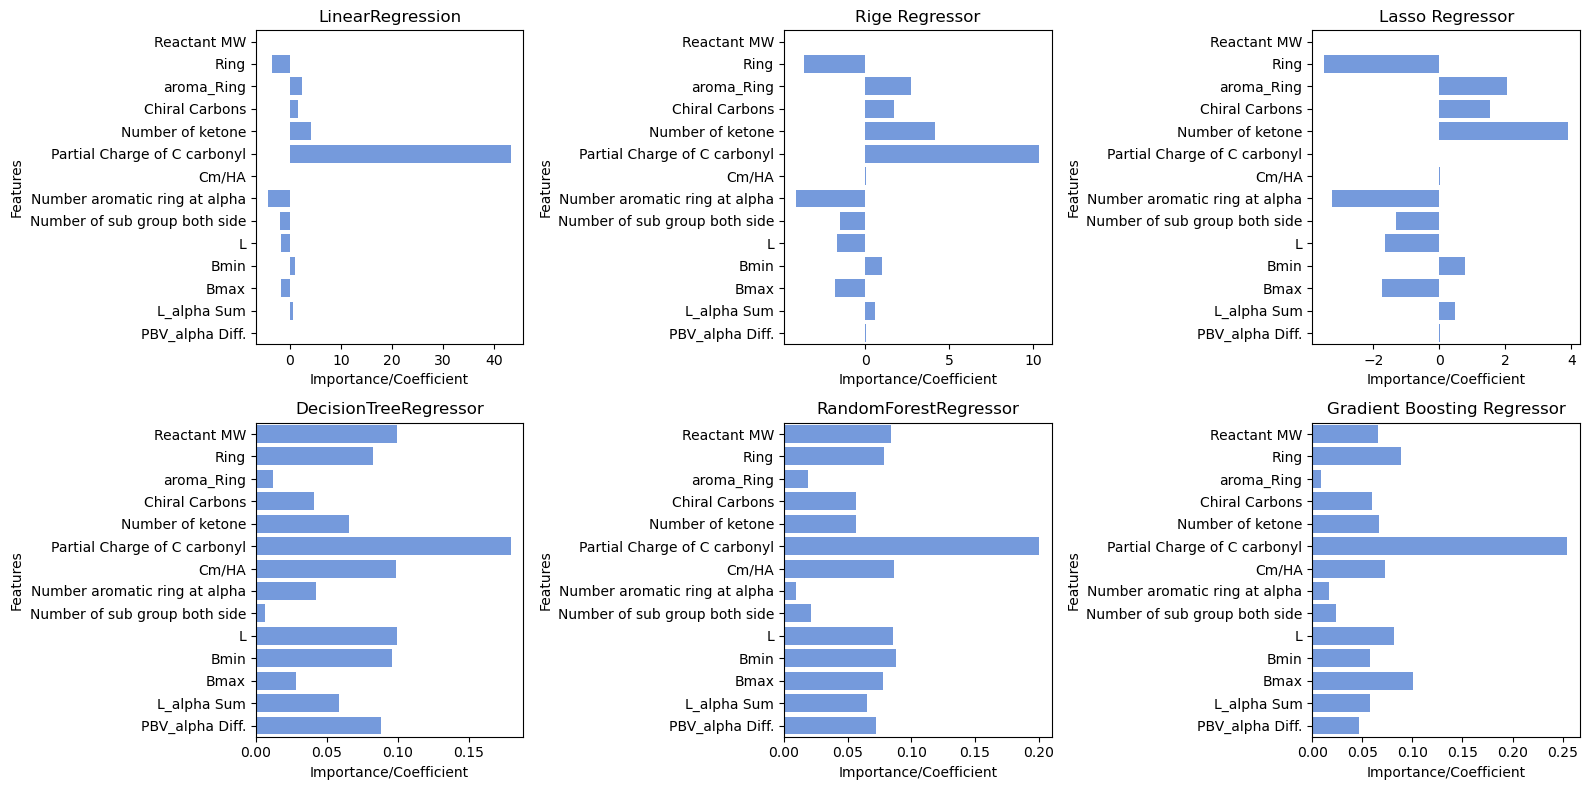

In [18]:
models = {
        'LinearRegression': LinearRegression(),
        'Rige Regressor': Ridge(alpha=1.0),
        'Lasso Regressor': Lasso(alpha=0.1, max_iter=10000), 
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1), 
        
    }
    
models_with_importance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, 'coef_'):
        # LinearRegression, Ridge, Lasso
        importance = model.coef_
    elif hasattr(model, 'feature_importances_'):
        # RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor
        importance = model.feature_importances_
    else:
        # Skip models without straightforward feature importance
        continue
    
    # Create DataFrame using saved column names
    feat_importances = pd.DataFrame(importance, index=column_names, columns=["Importance"])
    models_with_importance[name] = feat_importances


# Plotting
num_models = len(models_with_importance)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, (name, feat_importances) in enumerate(models_with_importance.items()):
    sns.barplot(data=feat_importances.reset_index(), y='index', x='Importance', ax=axes[i], color='cornflowerblue')
    axes[i].set_title(name)
    axes[i].set_ylabel('Features')
    axes[i].set_xlabel('Importance/Coefficient')

# Remove empty subplots if any
for j in range(num_models, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
from sklearn.tree import plot_tree

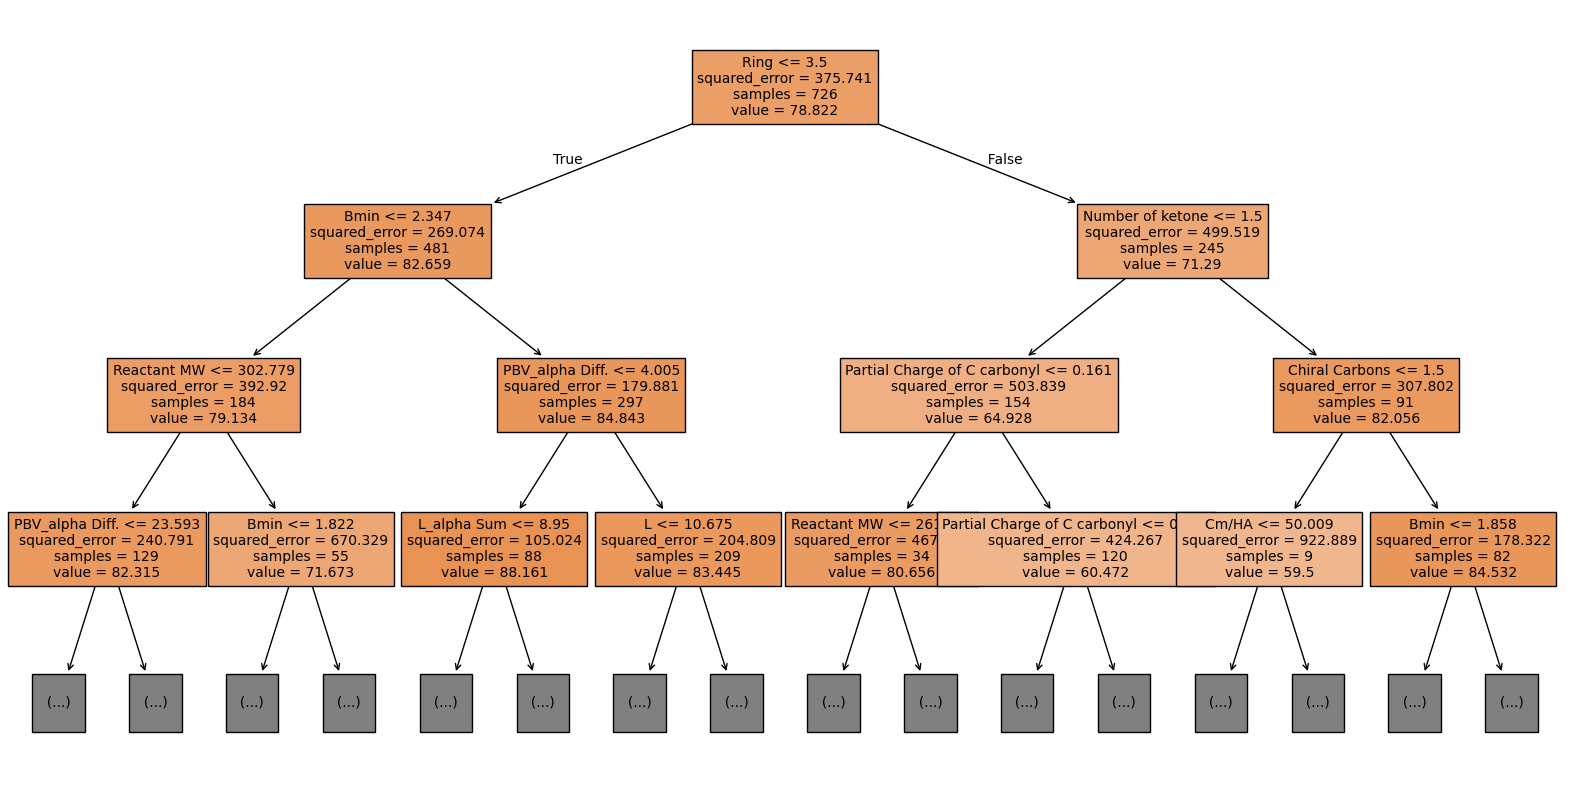

In [20]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

def plot_tree_limited_depth(tree, feature_names, max_depth=None):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, filled=True, fontsize=10, max_depth=max_depth)
    plt.show()

# Plot only the top 5 layers (depth 4, since depth starts from 0)
plot_tree_limited_depth(tree, feature_names=column_names, max_depth=3)